In [45]:
#Importing the requrired libraries

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

%matplotlib inline
warnings.filterwarnings("ignore")

# Question 1

In [25]:
#Reading the datafile using read_csv() from pandas
df=pd.read_csv("train.csv")

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
#label encoding the 'Sex' column from cateorical data to numerical data to perform the correlation calculation
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df.Sex.values)
df['Survived'].corr(df['Sex'])

-0.5433513806577552

In [48]:
#Finding the correlation for all the elements in the dataframe with all other elements
matrix = df.corr()
print(matrix)

               Age  Embarked      Fare     Parch    Pclass       Sex  \
Age       1.000000  0.048993  0.178740 -0.150917 -0.408106  0.063645   
Embarked  0.048993  1.000000  0.062017 -0.095975  0.037527 -0.121868   
Fare      0.178740  0.062017  1.000000  0.221539 -0.558629 -0.185523   
Parch    -0.150917 -0.095975  0.221539  1.000000  0.018322 -0.213125   
Pclass   -0.408106  0.037527 -0.558629  0.018322  1.000000  0.124617   
Sex       0.063645 -0.121868 -0.185523 -0.213125  0.124617  1.000000   
SibSp    -0.243699 -0.073937  0.160238  0.373587  0.060832 -0.109609   
Survived -0.077221  0.108669  0.257307  0.081629 -0.338481 -0.543351   
train    -0.018528 -0.072726 -0.030831 -0.005793  0.023988  0.010928   

             SibSp  Survived     train  
Age      -0.243699 -0.077221 -0.018528  
Embarked -0.073937  0.108669 -0.072726  
Fare      0.160238  0.257307 -0.030831  
Parch     0.373587  0.081629 -0.005793  
Pclass    0.060832 -0.338481  0.023988  
Sex      -0.109609 -0.543351  0.0

In [49]:
#Ploting the correlation matrix using seaborn 
df.corr().style.background_gradient(cmap="Greens")

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,train
Age,1.000000,0.048993,0.178740,-0.150917,-0.408106,0.063645,-0.243699,-0.077221,-0.018528
Embarked,0.048993,1.000000,0.062017,-0.095975,0.037527,-0.121868,-0.073937,0.108669,-0.072726
Fare,0.178740,0.062017,1.000000,0.221539,-0.558629,-0.185523,0.160238,0.257307,-0.030831
Parch,-0.150917,-0.095975,0.221539,1.000000,0.018322,-0.213125,0.373587,0.081629,-0.005793
Pclass,-0.408106,0.037527,-0.558629,0.018322,1.000000,0.124617,0.060832,-0.338481,0.023988
Sex,0.063645,-0.121868,-0.185523,-0.213125,0.124617,1.000000,-0.109609,-0.543351,0.010928
SibSp,-0.243699,-0.073937,0.160238,0.373587,0.060832,-0.109609,1.000000,-0.035322,0.033867
Survived,-0.077221,0.108669,0.257307,0.081629,-0.338481,-0.543351,-0.035322,1.000000,nan
train,-0.018528,-0.072726,-0.030831,-0.005793,0.023988,0.010928,0.033867,nan,1.000000


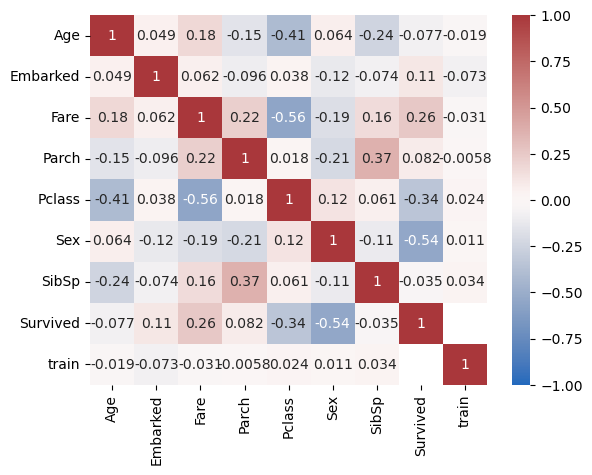

In [50]:
#Plottin te correlation matrix using heatmap function from seaborn module
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [51]:
#Applying the NAive bais classifier from sklearn module

train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

# Join data to analyse and process the set as one.
train_raw['train'] = 1
test_raw['train'] = 0
df = train_raw.append(test_raw, sort=False)




features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

df = df[features + [target] + ['train']]
# Categorical values need to be transformed into numeric.
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
train = df.query('train == 1')
test = df.query('train == 0')


In [53]:

# Drop missing values from the train set.
train.dropna(axis=0, inplace=True)
labels = train[target].values


train.drop(['train', target, 'Pclass'], axis=1, inplace=True)
test.drop(['train', target, 'Pclass'], axis=1, inplace=True)


In [54]:
#splitting the dataset into test and train

X_train, X_val, Y_train, Y_val = train_test_split(train, labels, test_size=0.2, random_state=1)

In [55]:
#Fitting the classfier to the Data
classifier = GaussianNB()

classifier.fit(X_train, Y_train)

GaussianNB()

In [36]:
y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80        85
         1.0       0.70      0.69      0.70        58

    accuracy                           0.76       143
   macro avg       0.75      0.74      0.75       143
weighted avg       0.75      0.76      0.75       143

[[68 17]
 [18 40]]
accuracy is 0.7552447552447552


# Question 2

In [37]:
glass=pd.read_csv("glass.csv")

In [38]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [39]:
glass.corr().style.background_gradient(cmap="Greens")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


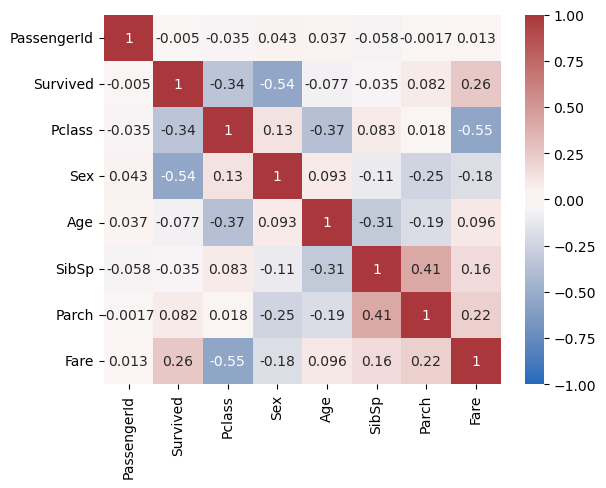

In [40]:
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [41]:
features = ['Rl', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
target = 'Type'


X_train, X_val, Y_train, Y_val = train_test_split(glass[::-1], glass['Type'],test_size=0.2, random_state=1)

classifier = GaussianNB()

classifier.fit(X_train, Y_train)


y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.92      0.92      0.92        12
           3       1.00      0.50      0.67         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.75      0.75      0.75         4

    accuracy                           0.84        43
   macro avg       0.76      0.69      0.71        43
weighted avg       0.89      0.84      0.85        43

[[18  1  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 1  0  3  2  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  1  0  3]]
accuracy is 0.8372093023255814


In [42]:
from sklearn.svm import SVC, LinearSVC

classifier = LinearSVC()

classifier.fit(X_train, Y_train)


y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.17      0.29        12
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.21      1.00      0.35         4

    accuracy                           0.58        43
   macro avg       0.37      0.36      0.27        43
weighted avg       0.74      0.58      0.55        43

[[19  0  0  0  0  0]
 [ 0  2  0  1  2  7]
 [ 0  0  0  0  0  6]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0  4]]
accuracy is 0.5813953488372093
